In this tutorial, we will use the diabetes dataset to learn about supervised learning regression techniques. In the last few weeks we have focused on classification where we are trying to predict a binary outcome. Regression on the other hand is where you try to predict a continuous value. For example, when you use your GPS for driving directions it predicts how many more minutes until you arrive at your destination. For this tutorial, we will try to predict the length of stay in the hospital for the diabetes dataset. 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
import time
import numpy as np

def fill_my_missing(df, df_mean_in):
    # This function fills the missing values

    for c in col2use:
        mean_value = df_mean_in.loc[df_mean_in.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

# Prepare data

Let's load our previously created training sets. 

In [2]:
df_train = pd.read_csv('df_train_all.csv')
df_valid= pd.read_csv('df_valid.csv')

For this tutorial, we will focus on just the numerical columns. 

In [5]:
col2use = ['num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient']


Let's plot a 2d histogram of the time in hospital vs number of medications. If you have smaller number of samples, you could use a scatter plot, but I find density plots are nice when the sample size is quite large. 

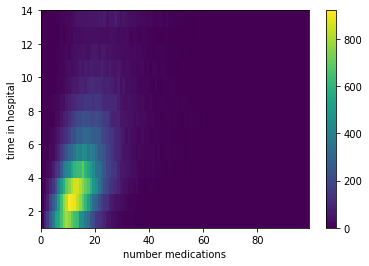

In [6]:
plt.hist2d(df_train.num_medications, df_train.time_in_hospital, bins = [range(0,100),range(1,15)])
plt.xlabel('number medications')
plt.ylabel('time in hospital')
plt.colorbar()
plt.show()

As you can see, there is a relationship between number of meds and time in hospital. 

In [9]:
# load the means
df_mean = pd.read_csv('df_mean.csv', names =['col','mean_val'])


In [10]:
# fill missing
df_train = fill_my_missing(df_train, df_mean)
df_valid = fill_my_missing(df_valid, df_mean)

In [11]:
# create X and y matrices
X_train = df_train[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train['time_in_hospital'].values
y_valid = df_valid['time_in_hospital'].values

print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

# create scaler
scaler  = StandardScaler()
scaler.fit(X_train)

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

Training shapes: (69540, 6) (69540,)
Validation shapes: (14901, 6) (14901,)


C:\Program Files\Anaconda3\envs\pa_2018\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Train a linear regression model

The first model we will focus on is linear regression which assumes that there is a linear relationship between the input variables and the output. 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Create linear regression object
regr = LinearRegression()
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# Train the model using the training sets
regr.fit(X_train_tf, y_train)

# Make predictions using the testing set
y_pred_valid = regr.predict(X_valid_tf)

In [15]:
y_pred_valid[:5]

array([4.9917545 , 3.30548603, 2.55638014, 3.22751256, 4.01726485])

In [16]:
y_valid[:5]

array([8, 3, 2, 3, 5], dtype=int64)

We can look at the coefficients for each variable. 

In [17]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.62386515  0.09328303  1.16735824 -0.0830957  -0.07802906  0.15709061]


Looks like number of lab procedures and number of medications have the biggest impact. 

We can evaluate the performance using mean squared error and R^2. 

In [18]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_valid, y_pred_valid))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_valid, y_pred_valid))

Mean squared error: 6.47
Variance score: 0.26


# Train a random forest regressor

Another popular regression model is using random forests. This is similar to the random forest classifier, except the criterion for splitting is different. Here, we will use mean square error as the criterion. 

In [19]:
from sklearn.ensemble import RandomForestRegressor

regr_RF = RandomForestRegressor(max_depth=10, random_state=42)
regr_RF

C:\Program Files\Anaconda3\envs\pa_2018\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [20]:
# Train the model using the training sets
regr_RF.fit(X_train_tf, y_train)

# Make predictions using the testing set
y_pred_valid = regr_RF.predict(X_valid_tf)

# The coefficients
print('Feature importance: \n', regr_RF.feature_importances_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_valid, y_pred_valid))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_valid, y_pred_valid))

Feature importance: 
 [0.24123286 0.05216934 0.62558279 0.02324546 0.02105521 0.03671433]
Mean squared error: 6.20
Variance score: 0.29


From this quick predictive modeling, it looks like random forest regressor performs better as a baseline model without any hyperparameter tuning. 